In [77]:
import tensorflow as tf 
import numpy as np 
from src import models,layers,utils 
from importlib import reload
import matplotlib.pyplot as plt 

2024-06-03 20:22:52.679934: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 20:22:52.680030: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 20:22:52.681834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-03 20:22:53.706309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [117]:
reload(layers)
reload(models)
x = utils.generate_sin()
x = tf.transpose(x, (2, 0, 1))

In [ ]:
i = tf.keras.Input(shape=(None, 2))
dense = tf.keras.layers.Dense(2, "linear")
attnrnn = models.AttentionRNN([6, 5], [4, 2], "linear", return_sequences=True, return_state=False)
o = attnrnn(i)
o = dense(o)
model = tf.keras.models.Model(i, o)
model.compile("rmsprop", "mse")
o = model(x)

In [ ]:
model.fit(x[:, :-1], x[:, 1:], epochs=200, batch_size=50)

In [ ]:
o = model(x)
plt.plot(o[15,:, 0])
plt.plot(x[15,:, 0])

In [ ]:
i = tf.keras.Input(shape=(None, 2))
cells = [tf.keras.layers.LSTMCell(unit, activation="tanh") for unit in [30, 2]]
stacked = tf.keras.layers.StackedRNNCells(cells)
stacked_lstm = tf.keras.layers.RNN(stacked, return_sequences=True, return_state=False)
dense = tf.keras.layers.Dense(2, "linear")
o = stacked_lstm(i)
o = dense(o)
lstm_model = tf.keras.models.Model(i, o)
lstm_model.compile("rmsprop", "mse")
_ = lstm_model(x)

In [ ]:
lstm_model.fit(x[:, :-1], x[:, 1:], epochs=200, batch_size=50)

In [ ]:
o = lstm_model(x)
plt.plot(o[15,:, 0])
plt.plot(x[15,:, 0])

In [20]:
reload(layers)
reload(models)
model = models.AttentionRNN_v2([6, 5], [4, 2], "silu", "linear")
_ = model(x)
model.compile("adam", "mse")

In [30]:
history = model.fit(x, x, epochs=400, batch_size=50)

Epoch 1/400
1/1 [==============================] - 1s 806ms/step - loss: 0.4038
Epoch 2/400
1/1 [==============================] - 1s 754ms/step - loss: 0.4043
Epoch 3/400
1/1 [==============================] - 1s 934ms/step - loss: 0.4062
Epoch 4/400
1/1 [==============================] - 1s 921ms/step - loss: 0.4050
Epoch 5/400
1/1 [==============================] - 1s 922ms/step - loss: 0.4059
Epoch 6/400
1/1 [==============================] - 1s 817ms/step - loss: 0.4038
Epoch 7/400
1/1 [==============================] - 1s 763ms/step - loss: 0.4043
Epoch 8/400
1/1 [==============================] - 1s 843ms/step - loss: 0.4062
Epoch 9/400
1/1 [==============================] - 1s 830ms/step - loss: 0.4038
Epoch 10/400
1/1 [==============================] - 1s 843ms/step - loss: 0.4044
Epoch 11/400
1/1 [==============================] - 1s 850ms/step - loss: 0.4071
Epoch 12/400
1/1 [==============================] - 1s 779ms/step - loss: 0.4061
Epoch 13/400
1/1 [===================

In [22]:
o = model(x)

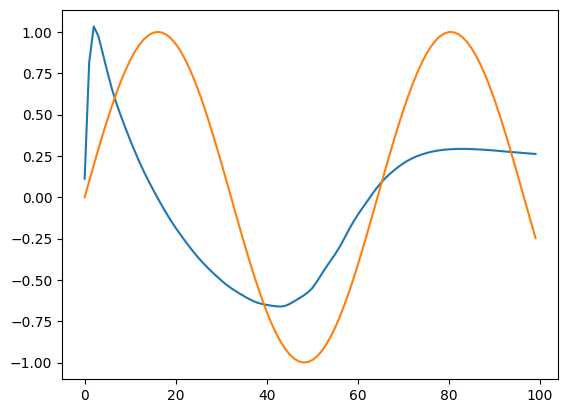

In [33]:
plt.plot(o[30, :, 0])
plt.plot(x[30, :, 0])

In [118]:
reload(layers)
reload(models)
scan_model = models.ScanRNNAttentionModel(heads=[10, 5], dims=[5, 2], activation="silu", concat_heads=False)
o = scan_model(x)
scan_model.compile("adam", "mse")

In [121]:
history = scan_model.fit(x, x, epochs=400, batch_size=50)

Epoch 1/400


I0000 00:00:1717440996.505305  520390 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 8s 8s/step - loss: 0.4726
Epoch 2/400
1/1 [==============================] - 0s 46ms/step - loss: 0.4663
Epoch 3/400
1/1 [==============================] - 0s 80ms/step - loss: 0.4600
Epoch 4/400
1/1 [==============================] - 0s 44ms/step - loss: 0.4538
Epoch 5/400
1/1 [==============================] - 0s 38ms/step - loss: 0.4477
Epoch 6/400
1/1 [==============================] - 0s 43ms/step - loss: 0.4417
Epoch 7/400
1/1 [==============================] - 0s 37ms/step - loss: 0.4358
Epoch 8/400
1/1 [==============================] - 0s 50ms/step - loss: 0.4300
Epoch 9/400
1/1 [==============================] - 0s 51ms/step - loss: 0.4242
Epoch 10/400
1/1 [==============================] - 0s 48ms/step - loss: 0.4185
Epoch 11/400
1/1 [==============================] - 0s 35ms/step - loss: 0.4129
Epoch 12/400
1/1 [==============================] - 0s 38ms/step - loss: 0.4075
Epoch 13/400
1/1 [==============================] - 0s 64ms/ste

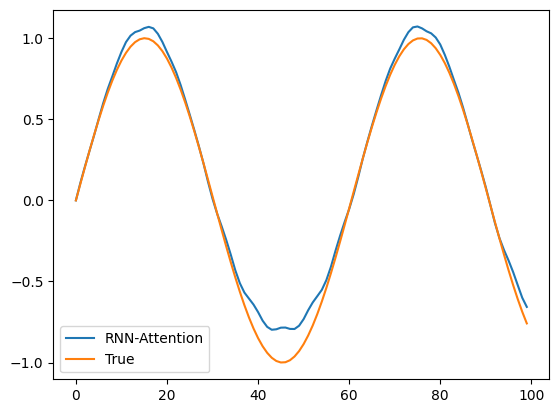

In [127]:
o = scan_model(x)
plt.plot(o[30, :, 0], label="RNN-Attention")
plt.plot(x[30, :, 0], label="True")
plt.legend()

Text(0.5, 0, 'Epochs')

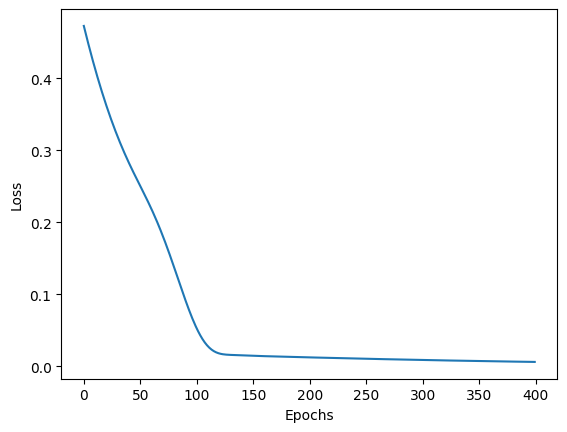

In [128]:
plt.plot(history.history["loss"])
plt.ylabel("Loss")
plt.xlabel("Epochs")